# Нейро-нечеткие системы
## Лабораторная работа №2

### Классификация, оценка точности классификации

Для выбранного набора данных необходимо провести сравнение результатов работы классификаторов из двух групп на выбор:
    
- регрессия (линейная, нелинейная, логистическая, метод опорных векторов), k-ближайших соседей;
- деревья принятия решений (деревья, случайный лес);
- бустинг (один из методов на выбор).

Для каждого метода необходимо построить матрицу ошибок и рассчитать одну из следующих метрик: f-мера, ROC AUC, accuracy.
При обучении классификатора необходимо использовать кроссвалидацию. Необходимо визуализировать изменение точности работы метода на разных шагах кроссвалидации. Необходимо показать как меняется точность классификации при изменении гиперпараметров.


### Набор данных


![подпись](https://storage.googleapis.com/kaggle-datasets-images/478/974/557711140aeab7ca242d1e903c4e058e/dataset-cover.jpg)


#### Содержимое

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам пластинчатых грибов семейства Агариковые и Лепиота, взятых из "The Audubon Society Field Guide to North American Mushrooms" (1981). Каждый вид идентифицирован как съедобный, ядовитый или неизвестно съедобный ли и не рекомендуемый. Последний класс был объединен с ядовитым. В справочнике четко сказано, что не существует простого правила для определения съедобности гриба;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

In [2]:
data = pd.read_csv('data/mushrooms.csv')

In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Разделение на признаки и целевую переменную
X = data.drop('class', axis=1)
y = data['class']

# Кодирование категориальных признаков
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование целевой переменной в числовой формат
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

In [5]:
# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=1000)
lr_predictions = cross_val_predict(lr, X_train, y_train, cv=5)
lr_f1 = f1_score(y_train, lr_predictions)
lr_roc_auc = roc_auc_score(y_train, lr_predictions)
lr_accuracy = accuracy_score(y_train, lr_predictions)
lr_conf_matrix = confusion_matrix(y_train, lr_predictions)
print("Логистическая регрессия:")
print("F-мера:", lr_f1)
print("ROC AUC:", lr_roc_auc)
print("Accuracy:", lr_accuracy)
print("Матрица ошибок:\n", lr_conf_matrix)

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_predictions = cross_val_predict(svm, X_train, y_train, cv=5)
svm_f1 = f1_score(y_train, svm_predictions)
svm_roc_auc = roc_auc_score(y_train, svm_predictions)
svm_accuracy = accuracy_score(y_train, svm_predictions)
svm_conf_matrix = confusion_matrix(y_train, svm_predictions)
print("\nМетод опорных векторов:")
print("F-мера:", svm_f1)
print("ROC AUC:", svm_roc_auc)
print("Accuracy:", svm_accuracy)
print("Матрица ошибок:\n", svm_conf_matrix)

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
knn_predictions = cross_val_predict(knn, X_train, y_train, cv=5)
knn_f1 = f1_score(y_train, knn_predictions)
knn_roc_auc = roc_auc_score(y_train, knn_predictions)
knn_accuracy = accuracy_score(y_train, knn_predictions)
knn_conf_matrix = confusion_matrix(y_train, knn_predictions)
print("\nМетод K-ближайших соседей:")
print("F-мера:", knn_f1)
print("ROC AUC:", knn_roc_auc)
print("Accuracy:", knn_accuracy)
print("Матрица ошибок:\n", knn_conf_matrix)

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_predictions = cross_val_predict(dt, X_train, y_train, cv=5)
dt_f1 = f1_score(y_train, dt_predictions)
dt_roc_auc = roc_auc_score(y_train, dt_predictions)
dt_accuracy = accuracy_score(y_train, dt_predictions)
dt_conf_matrix = confusion_matrix(y_train, dt_predictions)
print("\nМетод Деревья принятия решений:")
print("F-мера:", dt_f1)
print("ROC AUC:", dt_roc_auc)
print("Accuracy:", dt_accuracy)
print("Матрица ошибок:\n", dt_conf_matrix)

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_predictions = cross_val_predict(rf, X_train, y_train, cv=5)
rf_f1 = f1_score(y_train, rf_predictions)
rf_roc_auc = roc_auc_score(y_train, rf_predictions)
rf_accuracy = accuracy_score(y_train, rf_predictions)
rf_conf_matrix = confusion_matrix(y_train, rf_predictions)
print("\nМетод Случайный лес:")
print("F-мера:", rf_f1)
print("ROC AUC:", rf_roc_auc)
print("Accuracy:", rf_accuracy)
print("Матрица ошибок:\n", rf_conf_matrix)

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_predictions = cross_val_predict(gb, X_train, y_train, cv=5)
gb_f1 = f1_score(y_train, gb_predictions)
gb_roc_auc = roc_auc_score(y_train, gb_predictions)
gb_accuracy = accuracy_score(y_train, gb_predictions)
gb_conf_matrix = confusion_matrix(y_train, gb_predictions)
print("\nМетод Бустинг:")
print("F-мера:", gb_f1)
print("ROC AUC:", gb_roc_auc)
print("Accuracy:", gb_accuracy)
print("Матрица ошибок:\n", gb_conf_matrix)

Логистическая регрессия:
F-мера: 0.9471479213664196
ROC AUC: 0.9491273394140477
Accuracy: 0.9495306970303123
Матрица ошибок:
 [[3232  133]
 [ 195 2939]]

Метод опорных векторов:
F-мера: 0.9870842751049402
ROC AUC: 0.9872696144761335
Accuracy: 0.9876904139098323
Матрица ошибок:
 [[3362    3]
 [  77 3057]]

Метод K-ближайших соседей:
F-мера: 0.9977671451355662
ROC AUC: 0.9978540495794104
Accuracy: 0.9978458224342206
Матрица ошибок:
 [[3357    8]
 [   6 3128]]

Метод Деревья принятия решений:
F-мера: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Матрица ошибок:
 [[3365    0]
 [   0 3134]]

Метод Случайный лес:
F-мера: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Матрица ошибок:
 [[3365    0]
 [   0 3134]]

Метод Бустинг:
F-мера: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Матрица ошибок:
 [[3365    0]
 [   0 3134]]


In [6]:
# Выберем лучший метод
best_model = max([
    ("Логистическая регрессия", lr_predictions.mean()),
    ("Метод опорных векторов", svm_predictions.mean()),
    ("K-ближайших соседей", knn_predictions.mean()),
    ("Деревья принятия решений", dt_predictions.mean()),
    ("Случайный лес", rf_predictions.mean()),
    ("Бустинг (Gradient Boosting)", gb_predictions.mean())
], key=lambda x: x[1])

print("Лучший метод:", best_model[0])

# Обучение выбранной модели на всем обучающем наборе
best_model_name = best_model[0]
if best_model_name == "Логистическая регрессия":
    best_model = LogisticRegression(max_iter=1000)
elif best_model_name == "Метод опорных векторов":
    best_model = SVC()
elif best_model_name == "K-ближайших соседей":
    best_model = KNeighborsClassifier()
elif best_model_name == "Деревья принятия решений":
    best_model = DecisionTreeClassifier()
elif best_model_name == "Случайный лес":
    best_model = RandomForestClassifier()
else:
    best_model = GradientBoostingClassifier()

best_model = LogisticRegression(max_iter=1000)

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Вывод матрицы ошибок и оценка метрик
conf_matrix = confusion_matrix(y_test, predictions)
print("Матрица ошибок:\n", conf_matrix)
print("Accuracy:", f1_score(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("ROC AUC:", roc_auc_score(y_test, predictions))


Лучший метод: K-ближайших соседей
Матрица ошибок:
 [[798  45]
 [ 41 741]]
Accuracy: 0.9451530612244898
Accuracy: 0.947076923076923
ROC AUC: 0.9470947747813344


In [7]:
# на контрольной выборке

# метод: K-ближайших соседей
# Матрица ошибок:
#  [[837   6]
#  [  0 782]]
# Accuracy: 0.9961783439490446
# Accuracy: 0.9963076923076923
# ROC AUC: 0.99644128113879

# метод: Бустинг
# Матрица ошибок:
#  [[843   0]
#  [  0 782]]
# Accuracy: 1.0
# Accuracy: 1.0
# ROC AUC: 1.0

# RandomForest
# Матрица ошибок:
#  [[843   0]
#  [  0 782]]
# Accuracy: 1.0
# Accuracy: 1.0
# ROC AUC: 1.0

# Опорных векторов
# Матрица ошибок:
#  [[842   1]
#  [ 11 771]]
# Accuracy: 0.9922779922779922
# Accuracy: 0.9926153846153846
# ROC AUC: 0.992373632107957

# Логистическая регрессия
# Матрица ошибок:
#  [[799  44]
#  [ 41 741]]
# Accuracy: 0.9457562220804084
# Accuracy: 0.9476923076923077
# ROC AUC: 0.9476878945915361

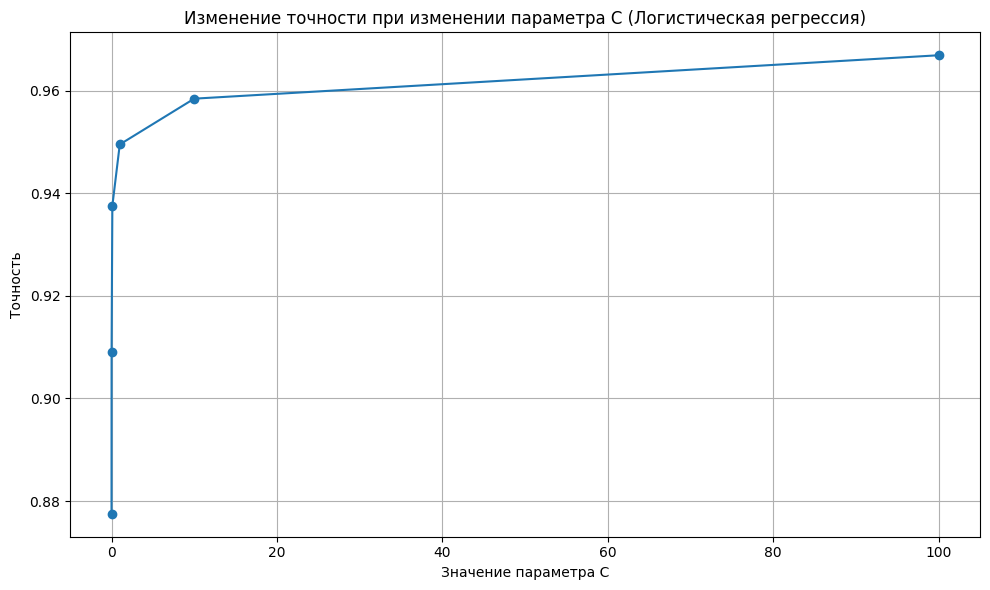

Оптимальный параметр C: 100
Точность: 0.9669177473796413


In [8]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Гиперпараметры для Логистической регрессии
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=10000)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(lr_params['C'], lr_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении параметра C (Логистическая регрессия)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального параметра C и его точности
print("Оптимальный параметр C:", lr_grid.best_params_['C'])
print("Точность:", lr_grid.best_score_)

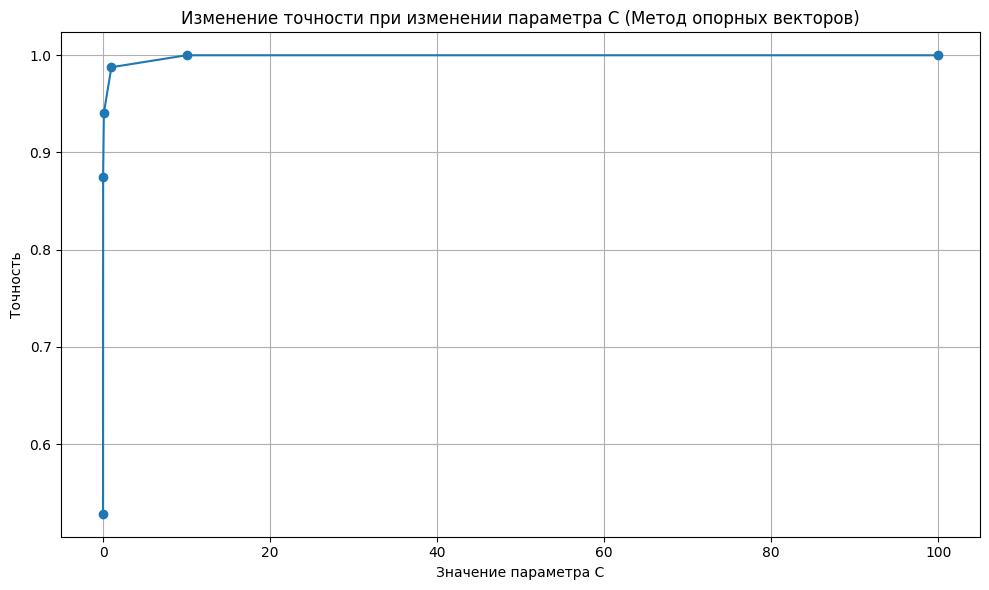

Оптимальный параметр C: 10
Точность: 1.0


In [9]:
# Гиперпараметры для Метода опорных векторов
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(svm_params['C'], svm_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении параметра C (Метод опорных векторов)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального параметра C и его точности
print("Оптимальный параметр C:", svm_grid.best_params_['C'])
print("Точность:", svm_grid.best_score_)

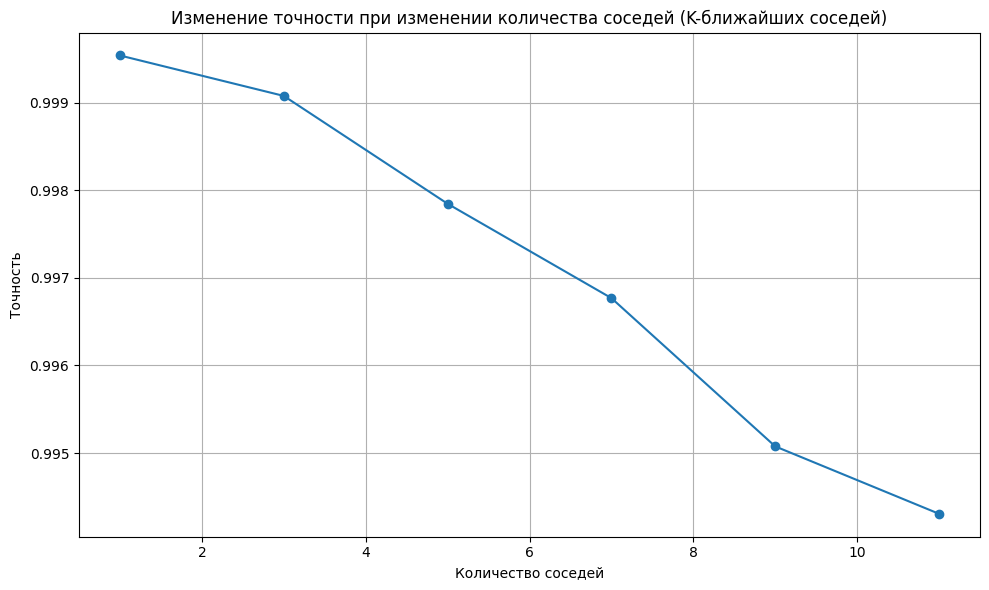

Оптимальное количество соседей: 1
Точность: 0.9995384615384616


In [10]:
# Гиперпараметры для K-ближайших соседей
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11]}

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества соседей
plt.figure(figsize=(10, 6))
plt.plot(knn_params['n_neighbors'], knn_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества соседей (K-ближайших соседей)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества соседей и его точности
print("Оптимальное количество соседей:", knn_grid.best_params_['n_neighbors'])
print("Точность:", knn_grid.best_score_)

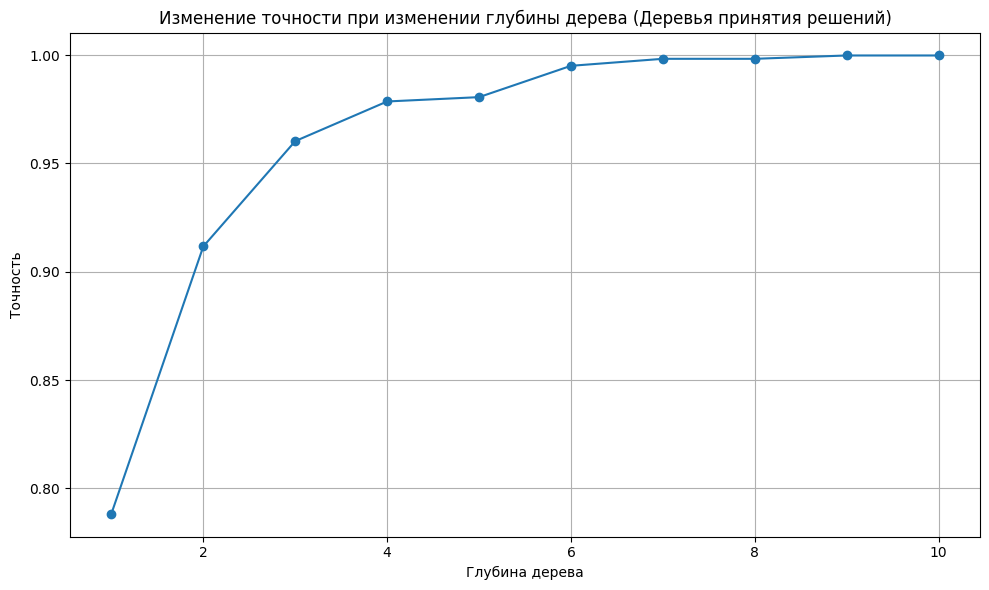

Оптимальная глубина дерева: 9
Точность: 0.9998461538461537


In [11]:
# Гиперпараметры для Деревьев принятия решений
dt_params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(dt_params['max_depth'], dt_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении глубины дерева (Деревья принятия решений)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимальной глубины дерева и его точности
print("Оптимальная глубина дерева:", dt_grid.best_params_['max_depth'])
print("Точность:", dt_grid.best_score_)

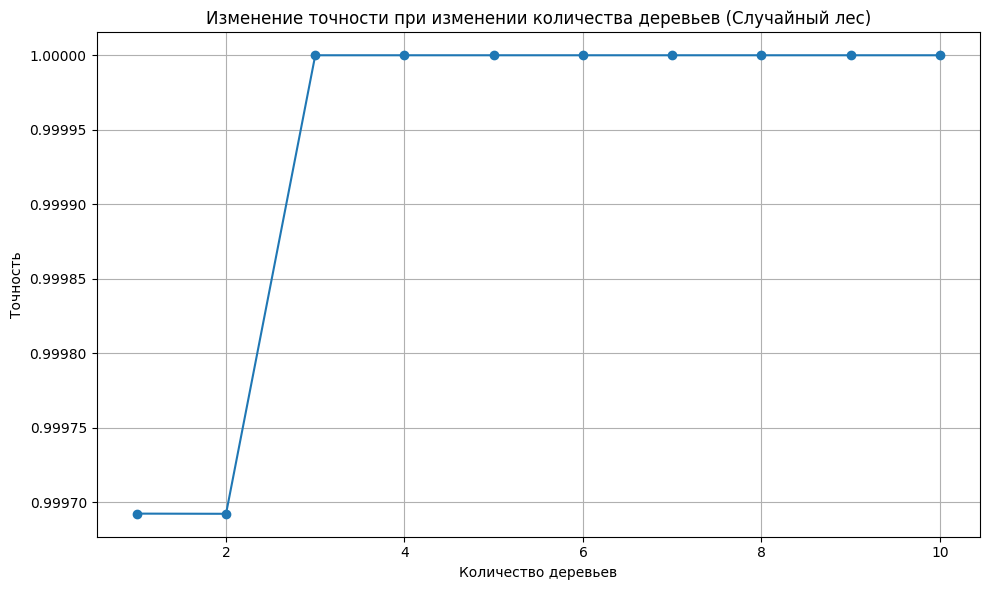

Оптимальное количество деревьев: 3
Точность: 1.0


In [12]:
# Гиперпараметры для Случайного леса
rf_params = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(rf_params['n_estimators'], rf_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества деревьев (Случайный лес)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества деревьев и его точности
print("Оптимальное количество деревьев:", rf_grid.best_params_['n_estimators'])
print("Точность:", rf_grid.best_score_)

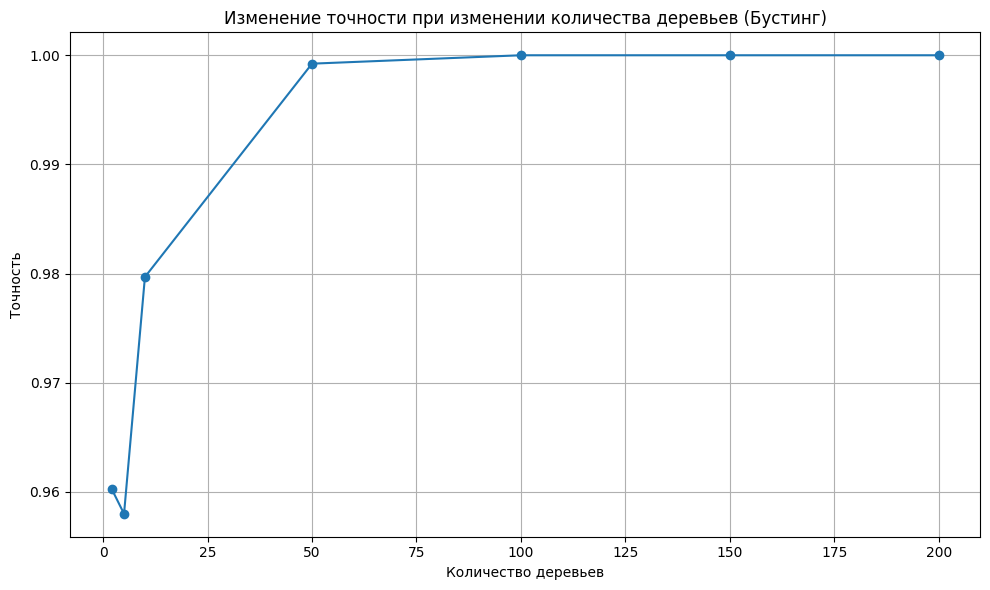

Оптимальное количество деревьев: 100
Точность: 1.0


In [13]:
# Гиперпараметры для Бустинга (Gradient Boosting)
gb_params = {'n_estimators': [2, 5, 10, 50, 100, 150, 200]}

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(gb_params['n_estimators'], gb_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества деревьев (Бустинг)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества деревьев и его точности
print("Оптимальное количество деревьев:", gb_grid.best_params_['n_estimators'])
print("Точность:", gb_grid.best_score_)

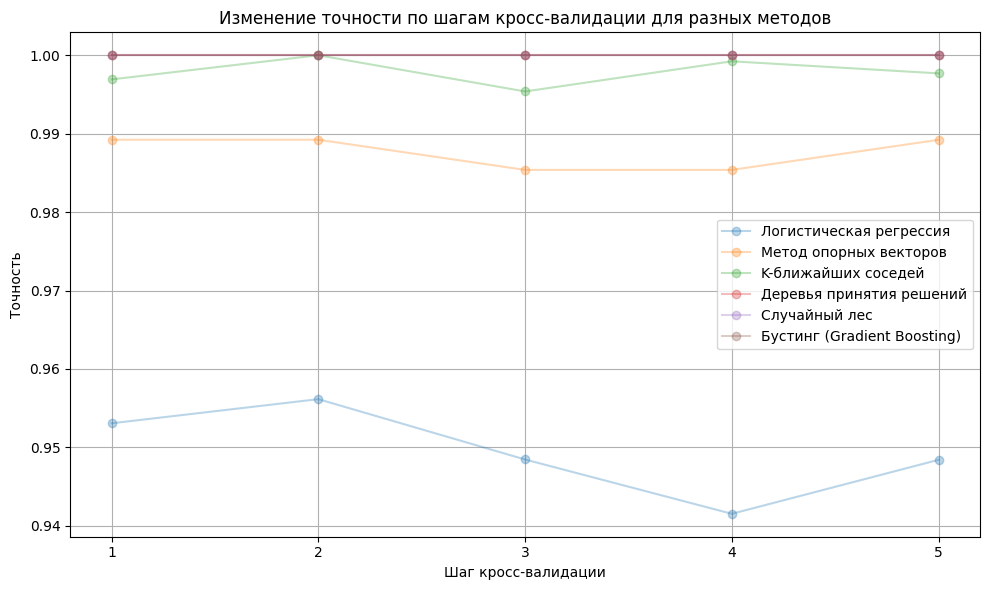

In [14]:
# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')

# Визуализация изменения точности по шагам кросс-валидации для каждого метода
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), lr_scores, marker='o', label='Логистическая регрессия', alpha=0.3)
plt.plot(np.arange(1, 6), svm_scores, marker='o', label='Метод опорных векторов', alpha=0.3)
plt.plot(np.arange(1, 6), knn_scores, marker='o', label='K-ближайших соседей', alpha=0.3)
plt.plot(np.arange(1, 6), dt_scores, marker='o', label='Деревья принятия решений', alpha=0.3)
plt.plot(np.arange(1, 6), rf_scores, marker='o', label='Случайный лес', alpha=0.3)
plt.plot(np.arange(1, 6), gb_scores, marker='o', label='Бустинг (Gradient Boosting)', alpha=0.3)
plt.xlabel("Шаг кросс-валидации")
plt.ylabel("Точность")
plt.title("Изменение точности по шагам кросс-валидации для разных методов")
plt.xticks(np.arange(1, 6))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()